UNIVERSITY OF WARSAW
FACULTY OF ECONOMIC SCIENCES
Machine learning classification project
by Sergey Amarin, Oleksii Zymin

In [415]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-ticks')
%matplotlib inline
from statistics import mean
from sklearn.metrics import accuracy_score

# Data description

In [416]:
#load the data

heart = pd.read_csv('D:\\UW\\2nd semester\\ML\\Project\\heart_failure_clinical_records_dataset.csv')

In [417]:
#dataset's size

heart.shape

(299, 13)

In [418]:
#types of variables

heart.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [419]:
#basic statistics

heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Oserving 75% percentile and max values we can mention that dataset potentially has outliers

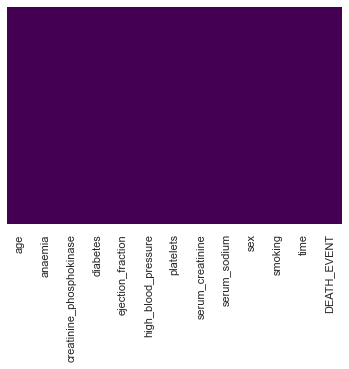

In [420]:
#looking for NAs

sns.heatmap(heart.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Dataset has no missing values

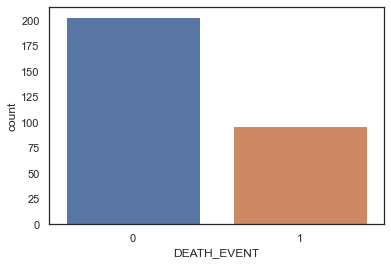

In [421]:
sns.countplot('DEATH_EVENT', data = heart)

From the above graph we can observe that independent variable is unbalanced

In [422]:
#dividing columns into 2 categories

numCols = ['age', 'creatinine_phosphokinase',
       'ejection_fraction',  'platelets',
       'serum_creatinine', 'serum_sodium', 'time']

In [423]:
levCols = [col for col in heart.columns if col not in numCols]
levCols.remove('DEATH_EVENT')
levCols

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

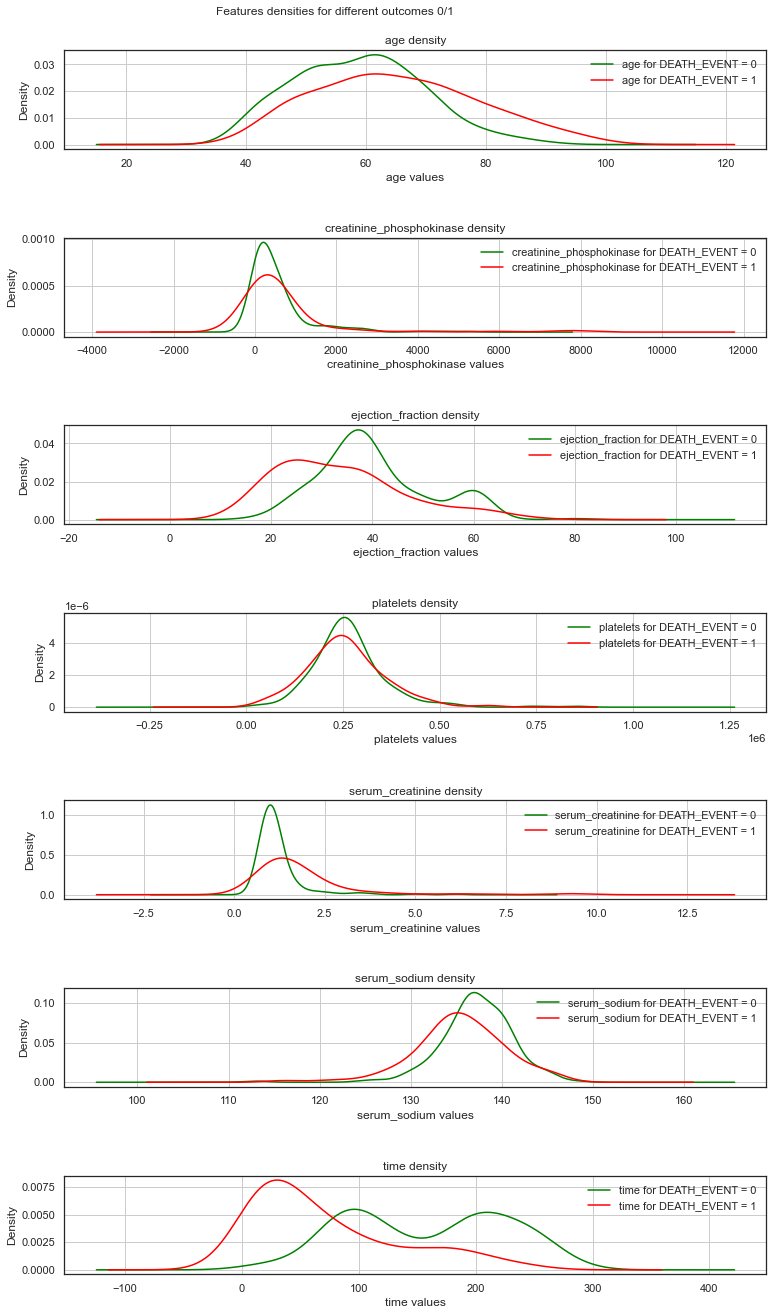

In [424]:
#plot densities for numerical variables

import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt


def plot_densities(data):
    # change fig size to fit all subplots beautifully 
    rcParams['figure.figsize'] = 15, 20

    # separate data based on outcome values 
    outcome_0 = data[data['DEATH_EVENT'] == 0]
    outcome_1 = data[data['DEATH_EVENT'] == 1]

    # init figure
    fig, axs = plt.subplots(len(names)-1, 1)
    fig.suptitle('Features densities for different outcomes 0/1')
    plt.subplots_adjust(left = 0.25, right = 0.9, bottom = 0.1, top = 0.95,
                        wspace = 0.2, hspace = 0.9)

    # plot densities for outcomes
    for column_name in names[:-1]: 
        ax = axs[names.index(column_name)]
        #plt.subplot(4, 2, names.index(column_name) + 1)
        outcome_0[column_name].plot(kind='density', ax=ax, subplots=True, 
                                    sharex=False, color="green", legend=True,
                                    label=column_name + ' for DEATH_EVENT = 0')
        outcome_1[column_name].plot(kind='density', ax=ax, subplots=True, 
                                     sharex=False, color="red", legend=True,
                                     label=column_name + ' for DEATH_EVENT = 1')
        ax.set_xlabel(column_name + ' values')
        ax.set_title(column_name + ' density')
        ax.grid('on')
    plt.show()
    rcParams['figure.figsize'] = 20,10

names = list(pd.concat([heart[numCols], heart['DEATH_EVENT']], axis=1).columns)

# plot correlation & densities
plot_densities(pd.concat([heart[numCols], heart['DEATH_EVENT']], axis=1))

In [425]:
#crosstabs for categorical variables

for var in levCols:
    display((pd.crosstab(heart["DEATH_EVENT"], heart[var], margins=True, normalize = 'index')).round(3))

anaemia,0,1
DEATH_EVENT,,
0,0.591,0.409
1,0.521,0.479
All,0.569,0.431


diabetes,0,1
DEATH_EVENT,,
0,0.581,0.419
1,0.583,0.417
All,0.582,0.418


high_blood_pressure,0,1
DEATH_EVENT,,
0,0.675,0.325
1,0.594,0.406
All,0.649,0.351


sex,0,1
DEATH_EVENT,,
0,0.350,0.650
1,0.354,0.646
All,0.351,0.649


smoking,0,1
DEATH_EVENT,,
0,0.675,0.325
1,0.688,0.312
All,0.679,0.321


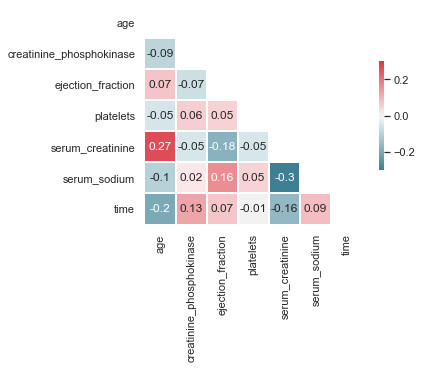

In [426]:
#correlation matrix for numerical variables

sns.set(style="white")
rcParams['figure.figsize'] = 6,4
corr = heart[numCols].corr('spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot = corr.round(2), linewidths=.5, cbar_kws={"shrink": .5})

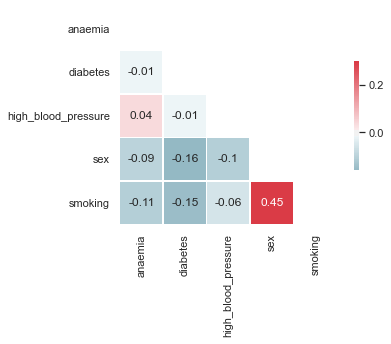

In [427]:
#correlation variable for categorical cariables

sns.set(style="white")

corr = heart[levCols].corr('spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot = corr.round(2), linewidths=.5, cbar_kws={"shrink": .5})

Correlation matricies shows that we don't have strong multicollinearity problem 

# Feature selection

In [428]:
#calculating Mutual info for every variable

from scipy import stats
from sklearn import feature_selection

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

features = numCols + levCols
minfos=[]
for var in features:
    minfos.append(feature_selection.mutual_info_classif(heart[var].values.reshape(-1,1),heart['DEATH_EVENT'].values, discrete_features = True))
   
imp = list(zip(minfos, features))
imp.sort(reverse=False)
imp

[(array([1.88771122e-06]), 'diabetes'),
 (array([9.30920961e-06]), 'sex'),
 (array([7.98743372e-05]), 'smoking'),
 (array([0.00218825]), 'anaemia'),
 (array([0.00311537]), 'high_blood_pressure'),
 (array([0.08325818]), 'serum_sodium'),
 (array([0.11431296]), 'ejection_fraction'),
 (array([0.13752405]), 'age'),
 (array([0.18025623]), 'serum_creatinine'),
 (array([0.36503494]), 'platelets'),
 (array([0.44362641]), 'creatinine_phosphokinase'),
 (array([0.5141553]), 'time')]

The most valuable variables are:
   * 'time'
   * 'creatinine_phosphokinase'
   * 'platelets'
    
While 'sex', 'smoking' and 'diabetes' doesn't seem to influence target variable a lot

In [429]:
#creating function for machine learning algorithm

def train_model(train, test, fold_no):
   X_train = train.drop('DEATH_EVENT', axis = 1)
   y_train = train['DEATH_EVENT']
   X_test = test.drop('DEATH_EVENT', axis = 1)
   y_test = test['DEATH_EVENT']
   model.fit(X_train,y_train)
   predictions = model.predict(X_test)
   #print('Fold',str(fold_no),'Accuracy:',accuracy_score(y_test,predictions))
   acc_list.append(accuracy_score(y_test,predictions))

In [430]:
#features ellimonation step-by-step beginning from the worst

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle = True)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(solver='lbfgs', max_iter=1000)

selection = []
for i in range(len(imp)):
    selection.append(imp[i][1]) 
selection.append('DEATH_EVENT')
selection2 = selection.copy()

try:
    for var in selection:
        heart2 = heart[selection2]
        data = heart2.loc[:, heart2.columns!='DEATH_EVENT'].to_numpy()
        target = heart2['DEATH_EVENT']
        acc_list = []
        fold_no = 1
        for train_index, test_index in skf.split(data, target):
            train = heart2.loc[train_index,:]
            test = heart2.loc[test_index,:]
            train_model(train,test,fold_no)
            fold_no += 1
        print('Mean Accuracy with '+var,mean(acc_list))
        selection2.remove(var)
except:
    pass

Mean Accuracy with diabetes 0.8058192090395481
Mean Accuracy with sex 0.8193785310734464
Mean Accuracy with smoking 0.8157627118644067
Mean Accuracy with anaemia 0.8094350282485876
Mean Accuracy with high_blood_pressure 0.8159887005649717
Mean Accuracy with serum_sodium 0.8061581920903955
Mean Accuracy with ejection_fraction 0.8293785310734464
Mean Accuracy with age 0.7993785310734464
Mean Accuracy with serum_creatinine 0.8090960451977401
Mean Accuracy with platelets 0.816045197740113
Mean Accuracy with creatinine_phosphokinase 0.8393785310734463
Mean Accuracy with time 0.8395480225988701


We don't see significant increasement of quality with variables ellimination. So we will use all of them

In [431]:
#determine the final data for analysis

data = heart.loc[:, heart.columns!='DEATH_EVENT'].to_numpy()
target = heart['DEATH_EVENT']

# Logistic regression

As a basic model we will use Logistic regression so we can test if all the advanced methods will be significantly better.

In [432]:
#define split parameters

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)

In [433]:
#define and train the model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [434]:
#make predictions
pred = model.predict(x_test)
prob = model.predict_proba(x_test)

In [435]:
pd.crosstab(pred, y_test)

DEATH_EVENT,0,1
row_0,,
0,35,9
1,5,11


In [436]:
#quality evaluating

from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.83        40
           1       0.69      0.55      0.61        20

    accuracy                           0.77        60
   macro avg       0.74      0.71      0.72        60
weighted avg       0.76      0.77      0.76        60



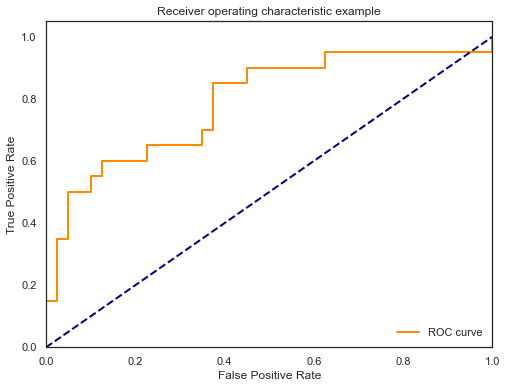

AUC score:  0.7875


In [437]:
#ROC and AUC

rcParams['figure.figsize'] = 8, 6
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, prob[:,1])
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import roc_auc_score
print('AUC score: ',roc_auc_score(y_test, prob[:,1]))

As a measuer of quality we will use AUC. Simple logistic regression yields AUC = 0.79

# Cross validation

In [438]:
#import libraries

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 123)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(solver='lbfgs', max_iter=1000)

As we found out that target variable is unbalanced we will use stratified KFold cross validation.
Out dataset is quite small so 5 folds will be enough.

In [439]:
#checking stratification

fold_no = 1
for train_index, test_index in skf.split(data, target):
    train = heart.loc[train_index,:]
    test = heart.loc[test_index,:]
    print('Fold',str(fold_no),
          'Class Ratio:',
          sum(test['DEATH_EVENT'])/len(test['DEATH_EVENT']))
    fold_no += 1

Fold 1 Class Ratio: 0.3333333333333333
Fold 2 Class Ratio: 0.31666666666666665
Fold 3 Class Ratio: 0.31666666666666665
Fold 4 Class Ratio: 0.31666666666666665
Fold 5 Class Ratio: 0.3220338983050847


In [440]:
#add print metrics for every fold in function

def train_model(train, test, fold_no):
   X_train = train.drop('DEATH_EVENT', axis = 1)
   y_train = train['DEATH_EVENT']
   X_test = test.drop('DEATH_EVENT', axis = 1)
   y_test = test['DEATH_EVENT']
   model.fit(X_train,y_train)
   predictions = model.predict(X_test)
   print('Fold',str(fold_no),
         'Accuracy:',
         accuracy_score(y_test,predictions))
   acc_list.append(accuracy_score(y_test,predictions))

In [441]:
#cross-validation

acc_list = []
fold_no = 1
for train_index, test_index in skf.split(data, target):
    train = heart.loc[train_index, :]
    test = heart.loc[test_index, :]
    train_model(train, test, fold_no)
    fold_no += 1
print('Mean Accuracy:  ', mean(acc_list))

Fold 1 Accuracy: 0.8166666666666667
Fold 2 Accuracy: 0.8166666666666667
Fold 3 Accuracy: 0.7666666666666667
Fold 4 Accuracy: 0.8833333333333333
Fold 5 Accuracy: 0.7966101694915254
Mean Accuracy:   0.8159887005649717


We can observe significant fluctuations in accuracy, so using KFold is reasonable.

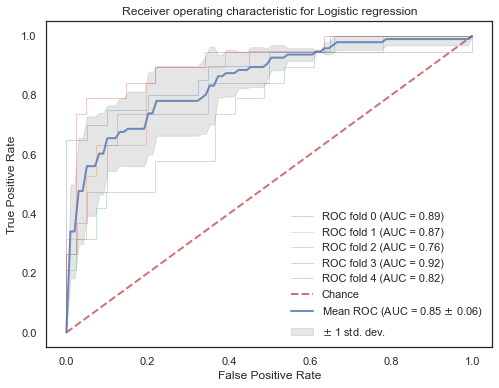

In [442]:
#plot ROC

from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve

# Import some data to play with
X = data
y = target
n_samples, n_features = X.shape
# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = skf
classifier = LogisticRegression(max_iter=1000)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic for Logistic regression")
ax.legend(loc="lower right")
plt.show()

We get better results with cross-validation. However, standard deviation of AUC is high = 0.06

# LDA

As all methods below uses distance metrics - we will standartize the data

In [443]:
#z-standartization

heart_z = heart
heart_z[numCols] = heart_z[numCols].apply(lambda x: (x-x.mean())/x.std())
data = heart_z.loc[:, heart_z.columns!='DEATH_EVENT'].to_numpy()
target = heart_z['DEATH_EVENT']

In [444]:
#import libraries and test priors LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
est = lda.fit(x_train, y_train)
preds_lda = est.predict(x_test)
probs_lda = est.predict_proba(x_test) #probs in scipen notation
sum(preds_lda == y_test)/len(preds_lda) #accuracy

0.8

In [445]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver="svd", priors=(0.5,0.5) ,store_covariance=True) # with priors
est = lda.fit(x_train, y_train)
preds_lda = est.predict(x_test)
probs_lda = est.predict_proba(x_test) #probs in scipen notation
sum(preds_lda == y_test)/len(preds_lda) #accuracy

0.8166666666666667

LDA with priors didn't increase our model, so we will use LDA without it

In [446]:
#change function for LDA

def train_model(train, test, fold_no):
   X_train = train.drop('DEATH_EVENT', axis = 1)
   y_train = train['DEATH_EVENT']
   X_test = test.drop('DEATH_EVENT', axis = 1)
   y_test = test['DEATH_EVENT']
   lda.fit(X_train,y_train)
   predictions = lda.predict(X_test)
   print('Fold',str(fold_no),
         'Accuracy:',
         accuracy_score(y_test,predictions))
   acc_list.append(accuracy_score(y_test,predictions))

In [447]:
#cross validation LDA

acc_list = []
fold_no = 1
for train_index, test_index in skf.split(data, target):
    train = heart.loc[train_index,:]
    test = heart.loc[test_index,:]
    train_model(train,test,fold_no)
    fold_no += 1
print('Mean Accuracy:  ',mean(acc_list))

Fold 1 Accuracy: 0.7166666666666667
Fold 2 Accuracy: 0.8
Fold 3 Accuracy: 0.75
Fold 4 Accuracy: 0.8166666666666667
Fold 5 Accuracy: 0.8305084745762712
Mean Accuracy:   0.7827683615819209


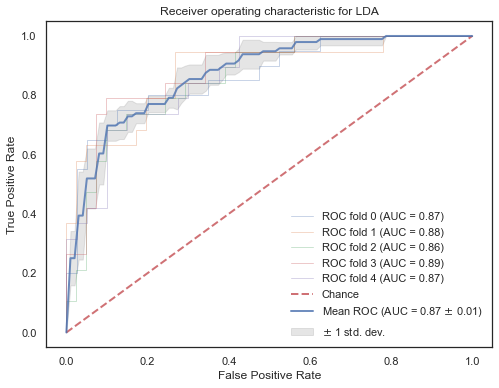

In [448]:
#ROC plot LDA

X = data
y = target
#X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape
# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = skf
classifier = LinearDiscriminantAnalysis()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic for LDA")
ax.legend(loc="lower right")
plt.show()

With LDA we got a better result with lower standard deviation. LDA is better that logistic regression in this case

# QDA

In [449]:
#import libraries and check priors QDA

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
est = qda.fit(x_train, y_train)
preds_qda = est.predict(x_test)
probs_qda = est.predict_proba(x_test) #probs in scipen notation
sum(preds_qda == y_test)/len(preds_qda) #accuracy

0.8666666666666667

In [450]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(priors=(0.5,0.5)) #with priors
est = qda.fit(x_train, y_train)
preds_qda = est.predict(x_test)
probs_qda = est.predict_proba(x_test) #probs in scipen notation
sum(preds_qda == y_test)/len(preds_qda) #accuracy

0.7833333333333333

QDA shows better results with priors

In [451]:
#changing function for QDA

def train_model(train, test, fold_no):
   X_train = train.drop('DEATH_EVENT', axis = 1)
   y_train = train['DEATH_EVENT']
   X_test = test.drop('DEATH_EVENT', axis = 1)
   y_test = test['DEATH_EVENT']
   qda.fit(X_train,y_train)
   predictions = qda.predict(X_test)
   print('Fold',str(fold_no),
         'Accuracy:',
         accuracy_score(y_test,predictions))
   acc_list.append(accuracy_score(y_test,predictions))

In [452]:
#cross validation QDA

fold_no = 1
acc_list = []
for train_index, test_index in skf.split(data, target):
    train = heart.loc[train_index,:]
    test = heart.loc[test_index,:]
    train_model(train,test,fold_no)
    fold_no += 1
print('Mean Accuracy:  ',mean(acc_list))

Fold 1 Accuracy: 0.7666666666666667
Fold 2 Accuracy: 0.7833333333333333
Fold 3 Accuracy: 0.7333333333333333
Fold 4 Accuracy: 0.8333333333333334
Fold 5 Accuracy: 0.7796610169491526
Mean Accuracy:   0.7792655367231639


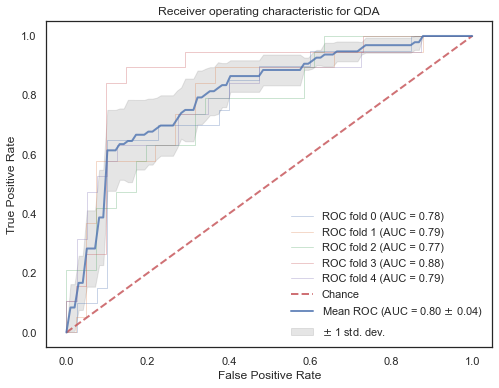

In [453]:
#ROC plot QDA

X = data
y = target
#X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape
# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = skf
classifier = QuadraticDiscriminantAnalysis()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic for QDA")
ax.legend(loc="lower right")
plt.show()

# KNN

In [454]:
#import libraries and change function kNN

from sklearn import neighbors

def train_model(train, test, fold_no):
    X_train = train.drop('DEATH_EVENT', axis = 1)
    y_train = train['DEATH_EVENT']
    X_test = test.drop('DEATH_EVENT', axis = 1)
    y_test = test['DEATH_EVENT']
    knn.fit(X_train,y_train)
    predictions = knn.predict(X_test)
    errors = predictions != y_test
    #print('Fold',str(fold_no),
    #      'Accuracy:',
    #     accuracy_score(y_test,predictions))
    acc_list.append(accuracy_score(y_test,predictions))

In [455]:
acc_list = []
fold_no = 1
for n_neighbors in [1, 2, 3, 5, 11, 15, 25, 51, 75, 101]:
    knn = neighbors.KNeighborsClassifier(n_neighbors, n_jobs=-1, p=2)
    acc_list = []
    for train_index, test_index in skf.split(data, target):
        train = heart.loc[train_index,:]
        test = heart.loc[test_index,:]
        train_model(train,test,fold_no)
        fold_no += 1
    print(n_neighbors, 'neighbors - mean accuracy:  ',mean(acc_list))

1 neighbors - mean accuracy:   0.7254802259887005
2 neighbors - mean accuracy:   0.7356497175141243
3 neighbors - mean accuracy:   0.7892090395480226
5 neighbors - mean accuracy:   0.7723728813559322
11 neighbors - mean accuracy:   0.7824858757062148
15 neighbors - mean accuracy:   0.7791525423728813
25 neighbors - mean accuracy:   0.7691525423728813
51 neighbors - mean accuracy:   0.7457062146892656
75 neighbors - mean accuracy:   0.7189830508474576
101 neighbors - mean accuracy:   0.6922598870056497


In [456]:
#defining optimal k paremeter

X_train = train.drop('DEATH_EVENT', axis = 1)
y_train = train['DEATH_EVENT']
X_test = test.drop('DEATH_EVENT', axis = 1)
y_test = test['DEATH_EVENT']
error_rates = []
for i in np.arange(1, 101):
    new_model = neighbors.KNeighborsClassifier(n_neighbors = i)
    new_model.fit(X_train, y_train)
    new_predictions = new_model.predict(X_test)
    error_rates.append(np.mean(new_predictions != y_test))

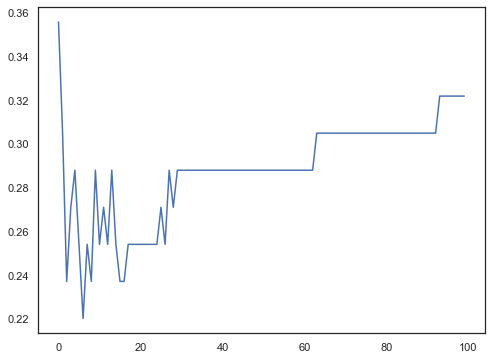

In [457]:
plt.plot(error_rates)

In [458]:
error_rates.index(min(error_rates))

6

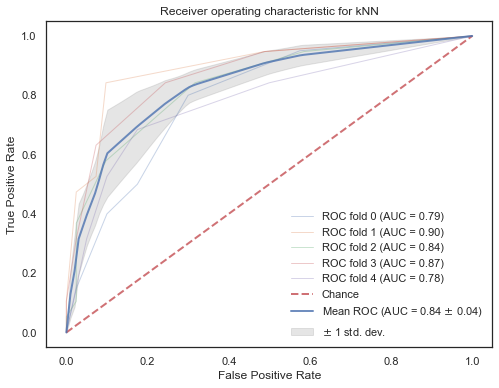

In [459]:
# Run classifier with cross-validation and plot ROC curves
cv = skf
classifier = neighbors.KNeighborsClassifier(error_rates.index(min(error_rates)), n_jobs=-1, p=2)

X = data
y = target
n_samples, n_features = X.shape

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic for kNN")
ax.legend(loc="lower right")
plt.show()

# SVM

In [460]:
#import libraries

from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.svm import SVC

In [461]:
#define optimal kernel

aucs = []
aucsT = []
kernels = ['linear', 'poly', 'rbf']
for kern in kernels:
    clf = SVC(C=1, cache_size=500, kernel=kern,
    max_iter=-1, probability=True,
    tol=0.001, verbose=False)
    for train_index, test_index in skf.split(data, target):
        clf.fit(X[train], y[train])
        prob = clf.predict_proba(X[test])
        aucs.append(metrics.roc_auc_score(y[test], prob[:,1]))

        prob = clf.predict_proba(X[train])
        aucsT.append(metrics.roc_auc_score(y[train], prob[:,1]))
    print(kern,'train AUC: ',np.mean(aucsT))
    print(kern, 'test AUC: ',np.mean(aucs))

linear train AUC:  0.8948609672536053
linear test AUC:  0.8592105263157895
poly train AUC:  0.9312166361246117
poly test AUC:  0.8401315789473685
rbf train AUC:  0.9396276525110883
rbf test AUC:  0.8583771929824563


'linear' kernel has the best quality on test data, so we will use it

In [462]:
#define optimal C parameter

for c in [0.01, 0.1, 0.25, 0.5, 1, 2, 5, 10]:
    print('C: ', c)
    aucs = []
    aucsT = []
    clf = SVC(C=c, cache_size=500, degree=3,kernel='linear',
        max_iter=-1, probability=True,
        tol=0.01, verbose=False)

    for train_index, test_index in skf.split(data, target):
        clf.fit(X[train], y[train])
        prob = clf.predict_proba(X[test])
        pred = clf.predict(X[test])
        aucs.append(metrics.roc_auc_score(y[test], prob[:,1]))

        prob = clf.predict_proba(X[train])
        aucsT.append(metrics.roc_auc_score(y[train], prob[:,1]))
    print('Train AUC: ', np.mean(aucsT))
#print(aucsT)
    print('Test AUC: ',np.mean(aucs))
#    print(aucs)

C:  0.01
Train AUC:  0.8957851963986933
Test AUC:  0.9
C:  0.1
Train AUC:  0.8971396701458051
Test AUC:  0.8775000000000001
C:  0.25
Train AUC:  0.8951477969882881
Test AUC:  0.8578947368421053
C:  0.5
Train AUC:  0.8954664966934907
Test AUC:  0.868421052631579
C:  1
Train AUC:  0.8957851963986935
Test AUC:  0.8605263157894736
C:  2
Train AUC:  0.8957851963986933
Test AUC:  0.8592105263157895
C:  5
Train AUC:  0.8937216158075054
Test AUC:  0.8565789473684211
C:  10
Train AUC:  0.8939208031232571
Test AUC:  0.8552631578947366


In this case C=0.01 seems to be the best choice

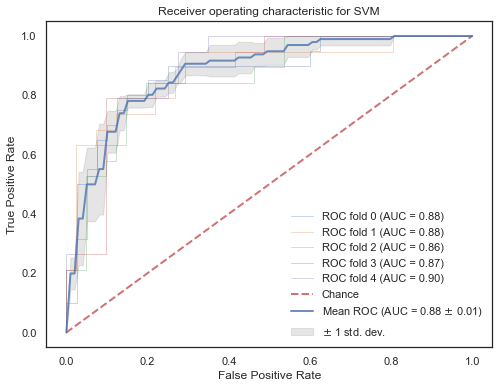

In [463]:
# Run classifier with cross-validation and plot ROC curves
cv = skf
classifier = SVC(C=0.01, cache_size=500, kernel='linear',
    max_iter=-1, probability=True,
    tol=0.001, verbose=False)

X = data
y = target
n_samples, n_features = X.shape

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic for SVM")
ax.legend(loc="lower right")
plt.show()

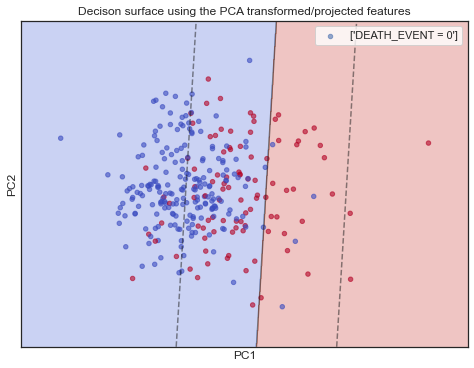

In [464]:
#plot the scatterplot with boeder

from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.decomposition import PCA

X = data  
y = target

#PCA dimension reduction
pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = classifier
clf = model.fit(Xreduced, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.3)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='face', alpha = 0.6, label=['DEATH_EVENT = 0'])
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features')
ax.legend(frameon=True)


xlim = ax.get_xlim()
ylim = ax.get_ylim()

#support vectors
x1 = np.linspace(xlim[0], xlim[1], 30)
y1 = np.linspace(ylim[0], ylim[1], 30)
Y1, X1 = np.meshgrid(y1, x1)
xy = np.vstack([X1.ravel(), Y1.ravel()]).T
P = model.decision_function(xy).reshape(X1.shape)
ax.contour(X1, Y1, P, colors='k',
           levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

This grapth looks messy, by we need to remember, that it was made from multiple dimensions

In [468]:
#inspect SVM classification report

print(pd.crosstab(pred, y[test]))
print(classification_report(y[test], pred))

DEATH_EVENT   0   1
row_0              
0            37   8
1             3  11
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        40
           1       0.79      0.58      0.67        19

    accuracy                           0.81        59
   macro avg       0.80      0.75      0.77        59
weighted avg       0.81      0.81      0.80        59



In [466]:
#plot lift curve

def plot_Lift_curve(y_val, y_pred, step=0.01):
    
    #Define an auxiliar dataframe to plot the curve
    aux_lift = pd.DataFrame()
    #Create a real and predicted column for our new DataFrame and assign values
    aux_lift['real'] = y_val
    aux_lift['predicted'] = y_pred
    #Order the values for the predicted probability column:
    aux_lift.sort_values('predicted',ascending=False,inplace=True)
    
    #Create the values that will go into the X axis of our plot
    x_val = np.arange(step,1+step,step)
    #Calculate the ratio of ones in our data
    ratio_ones = aux_lift['real'].sum() / len(aux_lift)
    #Create an empty vector with the values that will go on the Y axis our our plot
    y_v = []
    
    #Calculate for each x value its correspondent y value
    for x in x_val:
        num_data = int(np.ceil(x*len(aux_lift))) #The ceil function returns the closest integer bigger than our number 
        data_here = aux_lift.iloc[:num_data,:]   # ie. np.ceil(1.4) = 2
        ratio_ones_here = data_here['real'].sum()/len(data_here)
        y_v.append(ratio_ones_here / ratio_ones)
           
   #Plot the figure
    fig, axis = plt.subplots()
    fig.figsize = (40,40)
    axis.plot(x_val, y_v, 'g-', linewidth = 3, markersize = 5)
    axis.plot(x_val, np.ones(len(x_val)), 'k-')
    axis.set_xlabel('Proportion of sample')
    axis.set_ylabel('Lift')
    plt.title('Lift Curve')
    plt.show()
    print('Max Lift value: ',max(y_v))

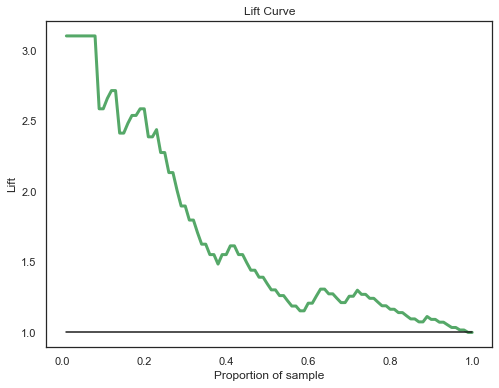

Max Lift value:  3.105263157894737


In [467]:
plot_Lift_curve(y[test], y[train], step=0.01)

In [475]:
#mean DEATH_EVENT chance
len(heart.loc[heart['DEATH_EVENT']==1,])/len(heart)

0.3210702341137124

Using lift we can derive the share of our population with the highest chance of having the disease. For example, we can conclude, that aproximately 30% of our sample have 2 time higher chance of death that the whode dataset in average.